# Image segmentation
**Segmentate cat and dog images using TensorFlow**

In [2]:
# Mount colab to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset 
In the dataset we have an annotation folder which is our target, <br>
And an Image folder which have the inputs

### 1. Untar dataset

In [ ]:
# Untar 2 files
!tar -xzvf "/content/drive/MyDrive/Segmentation/annotations.tar.gz" -C "/content/drive/MyDrive/Segmentation/"  
!tar -xzvf "/content/drive/MyDrive/Segmentation/images.tar_2.gz" -C "/content/drive/MyDrive/Segmentation/"

Streaming output truncated to the last 5000 lines.
images/american_bulldog_194.jpg
images/Birman_175.jpg
images/american_bulldog_178.jpg
images/staffordshire_bull_terrier_93.jpg
images/Egyptian_Mau_58.jpg
images/havanese_44.jpg
images/english_cocker_spaniel_97.jpg
images/Ragdoll_111.jpg
images/american_pit_bull_terrier_159.jpg
images/english_setter_134.jpg
images/english_setter_87.jpg
images/wheaten_terrier_198.jpg
images/pug_180.jpg
images/boxer_172.jpg
images/Sphynx_197.jpg
images/german_shorthaired_2.jpg
images/British_Shorthair_9.jpg
images/pug_89.jpg
images/japanese_chin_39.jpg
images/Ragdoll_20.jpg
images/american_bulldog_111.jpg
images/yorkshire_terrier_112.jpg
images/Persian_88.jpg
images/pug_9.jpg
images/Birman_40.jpg
images/British_Shorthair_272.jpg
images/havanese_7.jpg
images/pomeranian_154.jpg
images/beagle_49.jpg
images/British_Shorthair_94.jpg
images/Persian_90.jpg
images/staffordshire_bull_terrier_30.jpg
images/samoyed_113.jpg
images/english_cocker_spaniel_46.jpg
images

### 2. Load the image (inputs)

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

In [3]:
# define input and target dirs
input_dir = "/content/drive/MyDrive/Segmentation/images/"
target_dir = "/content/drive/MyDrive/Segmentation/annotations/trimaps"

In [4]:
# get path of images
input_imgs_path = sorted([os.path.join(input_dir, file_name) for file_name in  os.listdir(input_dir) if file_name.endswith('.jpg')])
target_paths = sorted([os.path.join(target_dir, file_name) for file_name in os.listdir(target_dir) if file_name.endswith(".png") and not file_name.startswith(".")])

### 3. Visualize data

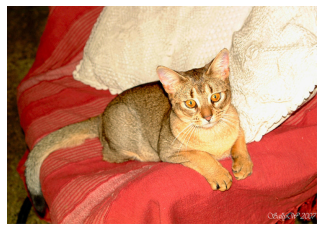

In [5]:
# visualize the input
plt.axis("off")
img_sample = load_img(input_imgs_path[5])
plt.imshow(img_sample)

In [6]:
def visualize_target(target_array):
  """
  This function will get the array of target image and visualize it as an image
  """
  # normalize array
  normalized = (target_array.astype("uint8") - 1) * 127
  plt.axis("off")
  plt.imshow(normalized[:, :, 0])


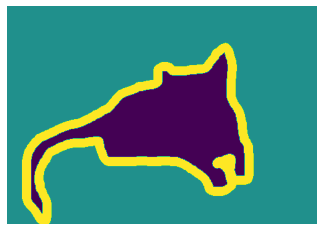

In [7]:
img_sample = img_to_array(load_img(target_paths[5], color_mode="grayscale"))
visualize_target(img_sample)

### 4. Prepare the data
First convert the datas into Numpy arrays, Then split them into train and validation.

In [8]:
import numpy as np
import random

In [9]:
# define the image size, get number of inp images
img_size = (200, 200)
num_imgs = len(input_imgs_path)

# shuffle the data
random.Random(1337).shuffle(input_imgs_path)
random.Random(1337).shuffle(target_paths)

In [10]:
def path_input(path):
  """
  load and return the image
  """
  img = img_to_array(load_img(path, target_size=img_size))
  return img

In [11]:
def path_target(path):
  """
  This function will load and return the  targets
  """
  img = img_to_array(load_img(path, target_size=img_size, color_mode="grayscale"))
  img = img.astype("uint8") - 1

  return img

In [12]:
# define arrays for images
input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")

# put target and input values into their arrays
for img in range(num_imgs):
  input_imgs[img] = path_input(input_imgs_path[img])
  targets[img] = path_target(target_paths[img])
  print(img)

Streaming output truncated to the last 5000 lines.
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579

In [13]:
# define the train and validation inputs and targets
num_validations = 1000
train_input_imgs = input_imgs[:-num_validations]
train_targets = targets[:-num_validations]
val_input_imgs = input_imgs[-num_validations:]
val_targets = targets[-num_validations:]

# Neural Networks
For image segmentation, We should use a model called U-net

### 1. Define the model

In [52]:
# import libraries
import keras
from keras.layers import *
from keras.models import Model, load_model

In [15]:
def get_model(img_sizem ,num_classes):
  """
  This function will define the U-net model
  """
  # define the input layer
  input_layer = Input(shape=img_size + (3, ))

  # Rescaling layer
  rescaling = Rescaling(1. / 255)(input_layer) # rescale input images to [0, 1]

  # define convolution layers (Downward)
  x = Conv2D(64, 3, padding="same", activation="relu", strides=2)(rescaling)
  x = Conv2D(64, 3, padding="same", activation="relu")(x)
  x = Conv2D(128, 3, padding="same", activation="relu", strides=2)(x)
  x = Conv2D(128, 3, padding="same", activation="relu")(x)
  x = Conv2D(256, 3, padding="same", activation="relu", strides=2)(x)
  x = Conv2D(256, 3, padding="same", activation="relu")(x)
  x = Dropout(0.01)(x)

  # define Transpose layers (Upward)
  y = Conv2DTranspose(256, 3, padding="same", activation="relu")(x)
  y = Conv2DTranspose(256, 3, padding="same", activation="relu", strides=2)(y)
  y = Conv2DTranspose(128, 3, padding="same", activation="relu")(y)
  y = Conv2DTranspose(128, 3, padding="same", activation="relu", strides=2)(y)
  y = Conv2DTranspose(64, 3, padding="same", activation="relu")(y)
  y = Conv2DTranspose(64, 3, padding="same", activation="relu", strides=2)(y)
  y = Dropout(0.01)(y)

  # define the output layer
  output_layer = Conv2D(num_classes, 3, padding="same", activation="softmax")(y)

  # create the model
  model = Model(input_layer, output_layer)

  return model

In [16]:
# make the model
model = get_model(img_size, 3)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 256)       295168

### 2. Train the model

In [17]:
# compile the model
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

In [18]:
# define callback
callbacks = [keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)]

In [19]:
# train
history = model.fit(train_input_imgs, train_targets, epochs=50, batch_size=64, validation_data=(val_input_imgs, val_targets), callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 84s 685ms/step - loss: 1.0671 - val_loss: 0.9362
Epoch 2/50
100/100 [==============================] - 62s 617ms/step - loss: 0.9293 - val_loss: 0.8405
Epoch 3/50
100/100 [==============================] - 63s 629ms/step - loss: 0.8219 - val_loss: 0.7772
Epoch 4/50
100/100 [==============================] - 64s 640ms/step - loss: 0.8007 - val_loss: 0.7520
Epoch 5/50
100/100 [==============================] - 64s 642ms/step - loss: 0.7226 - val_loss: 0.7246
Epoch 6/50
100/100 [==============================] - 64s 644ms/step - loss: 0.6591 - val_loss: 0.5898
Epoch 7/50
100/100 [==============================] - 64s 643ms/step - loss: 0.6223 - val_loss: 0.5827
Epoch 8/50
100/100 [==============================] - 64s 641ms/step - loss: 0.5886 - val_loss: 0.5773
Epoch 9/50
100/100 [==============================] - 64s 641ms/step - loss: 0.5619 - val_loss: 0.5304
Epoch 10/50
100/100 [==============================] - 64s 642ms/step - l

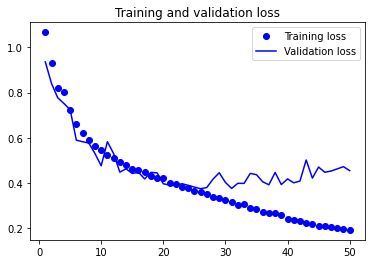

In [20]:
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

1/1 [==============================] - 0s 227ms/step


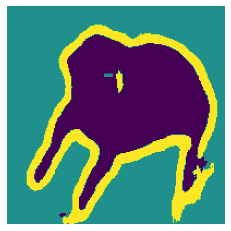

In [57]:
from tensorflow.keras.utils import array_to_img

model = load_model("/content/best_model.keras")

i = 690
test_image = val_input_imgs[i]
plt.axis("off")
plt.imshow(array_to_img(test_image))
#plt.imshow(test_image)

mask = model.predict(np.expand_dims(test_image, 0))[0]

def display_mask(pred):
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    plt.axis("off")
    plt.imshow(mask)

display_mask(mask)

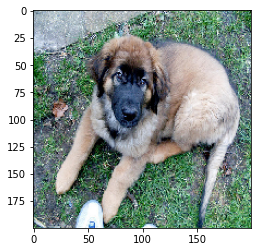

In [58]:
plt.imshow(array_to_img(test_image))